In [1]:
import pandas as pd
import numpy as np

belpop_df = pd.read_csv('bel_pop_2018_copy.csv')
autosomal_df = pd.read_csv('autosomal_2019.csv')

In [2]:
belpop_df.head()

,D3S1358-0,D3S1358-1,vWA-0,vWA-1,TH01-0,TH01-1,TPOX-0,TPOX-1,CSF1PO-0,CSF1PO-1,...,PentaE-1,PentaD-0,PentaD-1,D2S1338-0,D2S1338-1,D19S433-0,D19S433-1,population,id,region
0,17.0,18.0,17,17,6,6,8.0,11.0,9.0,10.0,...,13,11,15,18.0,24.0,13,15,Полоцк,1,Поозерье
1,16.0,17.0,15,18,9,9-3,8.0,8.0,10.0,12.0,...,16,9,13,17.0,19.0,13,14,Полоцк,2,Поозерье
2,16.0,18.0,16,18,7,9,8.0,8.0,10.0,12.0,...,17,11,12,17.0,19.0,14,14,Полоцк,3,Поозерье
3,15.0,16.0,14,15,9,9-3,8.0,8.0,10.0,11.0,...,12,10,13,18.0,23.0,12,14,Полоцк,4,Поозерье
4,15.0,18.0,17,19,9-3,9-3,8.0,8.0,10.0,11.0,...,17,9,9,20.0,20.0,13,13,Полоцк,5,Поозерье


In [3]:
autosomal_df.head()

,D3S1358-0,D3S1358-1,D1S1656-0,D1S1656-1,D2S441-0,D2S441-1,D10S1248-0,D10S1248-1,D13S317-0,D13S317-1,...,D20S482-1,D6S1043-0,D6S1043-1,D17S1301-0,D17S1301-1,D4S2408-0,D4S2408-1,region,nationality,id
0,14,15,16.0,17.3,10.0,14.0,13,16,8,10,...,15,11,11,11,13,9,11,Центральный,Русские,17
1,15,17,14.0,17.3,10.0,14.0,14,15,8,12,...,15,11,16,11,11,9,10,Поднепровье,Белорусы,39
2,17,18,12.0,17.3,11.0,15.0,14,15,11,11,...,16,11,18,12,12,9,9,Центральный,Белорусы,46
3,15,15,18.3,18.3,11.0,11.0,14,15,9,11,...,15,10,12,11,13,8,9,Центральный,Белорусы,85
4,18,18,11.0,12.0,11.0,14.0,13,14,8,11,...,16,11,11,10,13,8,11,Центральный,Белорусы,103


In [4]:
assert sorted(belpop_df.region.unique()) == sorted(autosomal_df.region.unique())

**Columns**

In [5]:
shared_cols = [col for col in belpop_df.columns if col in autosomal_df.columns]
LOCI = shared_cols[:-2]
print(LOCI)

['D3S1358-0', 'D3S1358-1', 'vWA-0', 'vWA-1', 'TH01-0', 'TH01-1', 'TPOX-0', 'TPOX-1', 'CSF1PO-0', 'CSF1PO-1', 'D5S818-0', 'D5S818-1', 'D7S820-0', 'D7S820-1', 'D13S317-0', 'D13S317-1', 'D16S539-0', 'D16S539-1', 'D18S51-0', 'D18S51-1', 'D8S1179-0', 'D8S1179-1', 'D21S11-0', 'D21S11-1', 'FGA-0', 'FGA-1', 'PentaE-0', 'PentaE-1', 'PentaD-0', 'PentaD-1', 'D2S1338-0', 'D2S1338-1', 'D19S433-0', 'D19S433-1']


**Preprocessing**

In [6]:
# Nan loci
belpop_df.drop([750, 751, 752, 753], axis=0, inplace=True)

In [7]:
belpop_df.shape, autosomal_df.shape

((830, 39), (548, 59))

In [8]:
def parse_value(x):
    if x == '?':
        return 0
    # Belpop format correction
    x = str(x).replace('-', '.')
    if x[-1] == '.':
        x = x[:-1]
    return float(x)

for col in LOCI:
    belpop_df[col] = belpop_df[col].apply(lambda x: parse_value(x))
    autosomal_df[col] = autosomal_df[col].apply(lambda x: parse_value(x))

In [9]:
belpop_df['source'] = 'belpop'
autosomal_df['source'] = 'autosomal'

In [16]:
COLUMNS = ['id', 'region', 'source'] + LOCI
merged_data = pd.concat([belpop_df[COLUMNS], autosomal_df[COLUMNS]]).reset_index(drop=True)

In [26]:
# Unknown loci
no_allele = merged_data.loc[((merged_data[LOCI] == 0).sum(axis=1) > 0)].index
merged_data = merged_data.drop(no_allele, axis=0).reset_index(drop=True)

In [27]:
merged_data.shape

(1361, 37)

# PCA

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = merged_data[LOCI].values
X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)
X_scaled_pca = PCA(n_components=2).fit_transform(X_scaled)

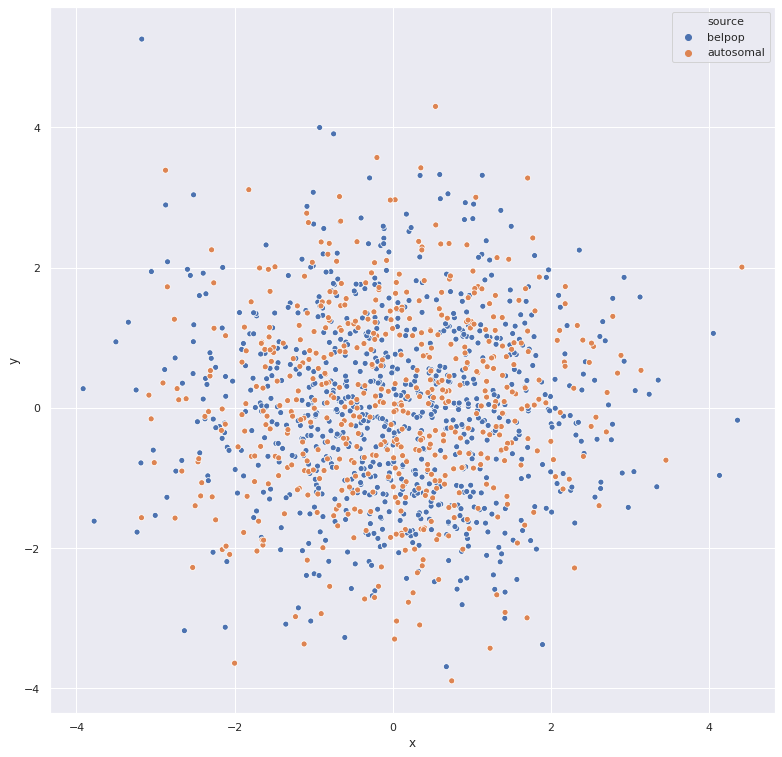

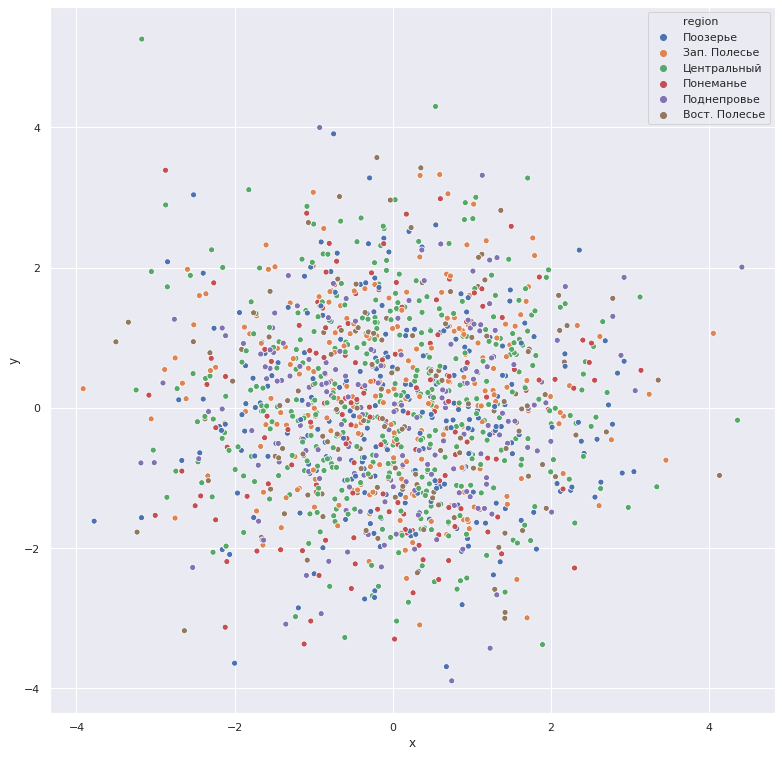

In [33]:
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt

def show_vis(vis_df, col):
    tmp_df = pd.DataFrame({"x": vis_df[:,0], "y": vis_df[:,1], col: merged_data[col]})
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(111)
    sns.scatterplot(x="x", y="y", data=tmp_df, hue=col, ax=ax)
    plt.show()

show_vis(X_scaled_pca, 'source')
show_vis(X_scaled_pca, 'region')

# 1 vs 1 clf

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

def plot_roc_aucs(tps):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    for tl, pp, title in tps:
        fpr, tpr, _ = roc_curve(tl, pp)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr,
                lw=2, label='ROC curve (area = %0.2f) %s' % (roc_auc, title))
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Поозерье vs Зап. Полесье


Поозерье        252
Зап. Полесье    235
Name: region, dtype: int64

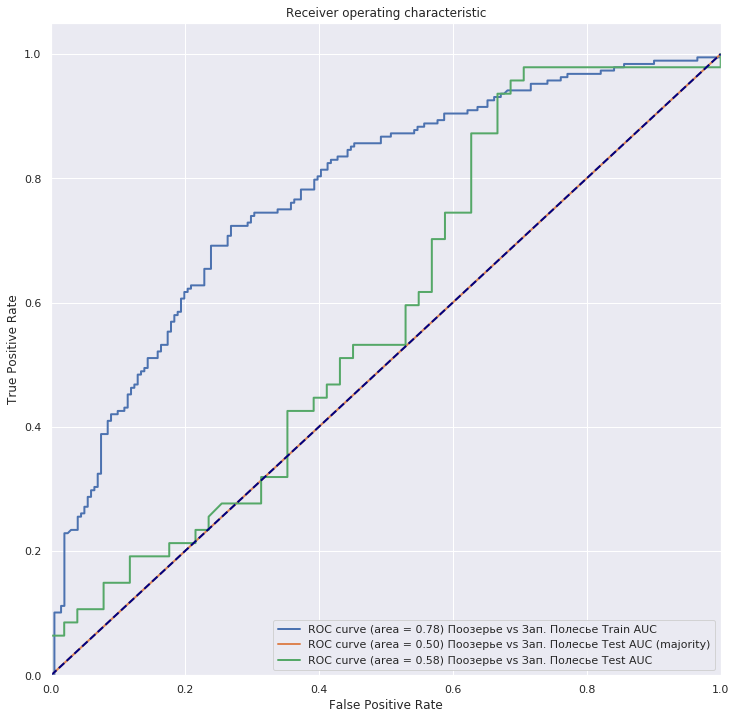

Поозерье vs Центральный


Центральный    394
Поозерье       252
Name: region, dtype: int64

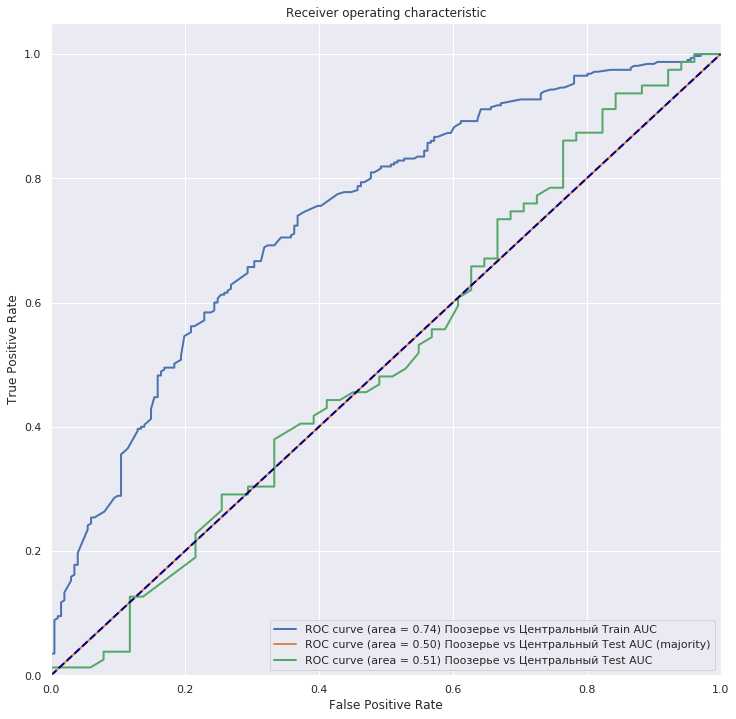

Поозерье vs Понеманье


Поозерье     252
Понеманье    149
Name: region, dtype: int64

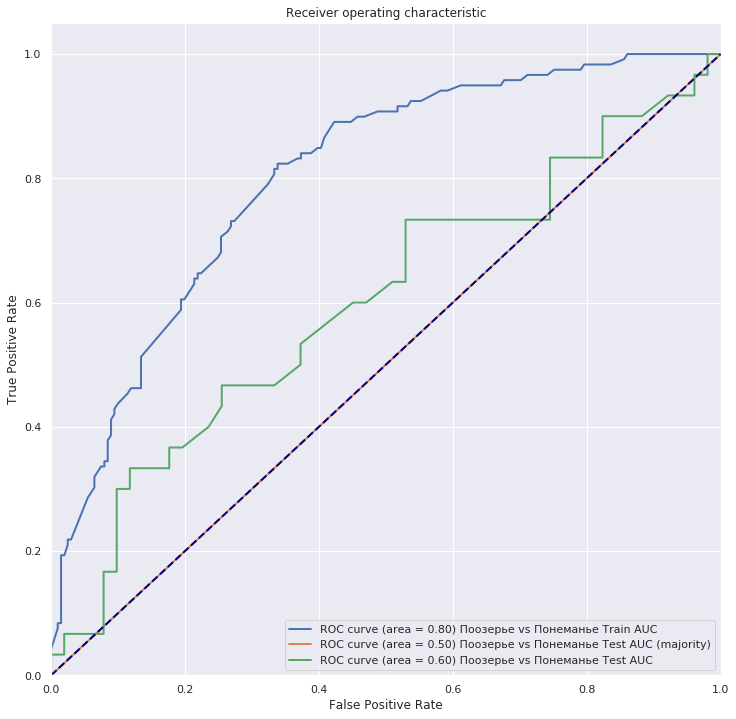

Поозерье vs Поднепровье


Поозерье       252
Поднепровье    187
Name: region, dtype: int64

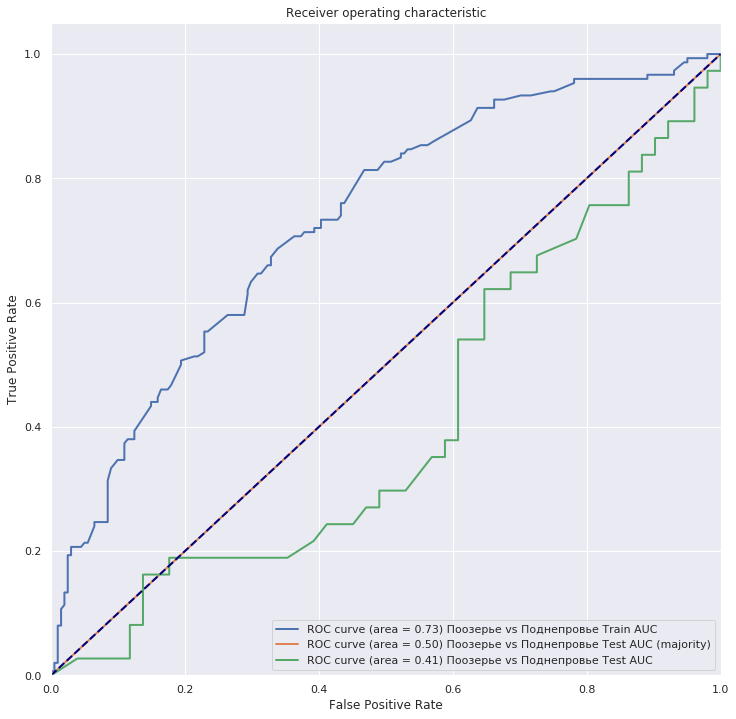

Поозерье vs Вост. Полесье


Поозерье         252
Вост. Полесье    144
Name: region, dtype: int64

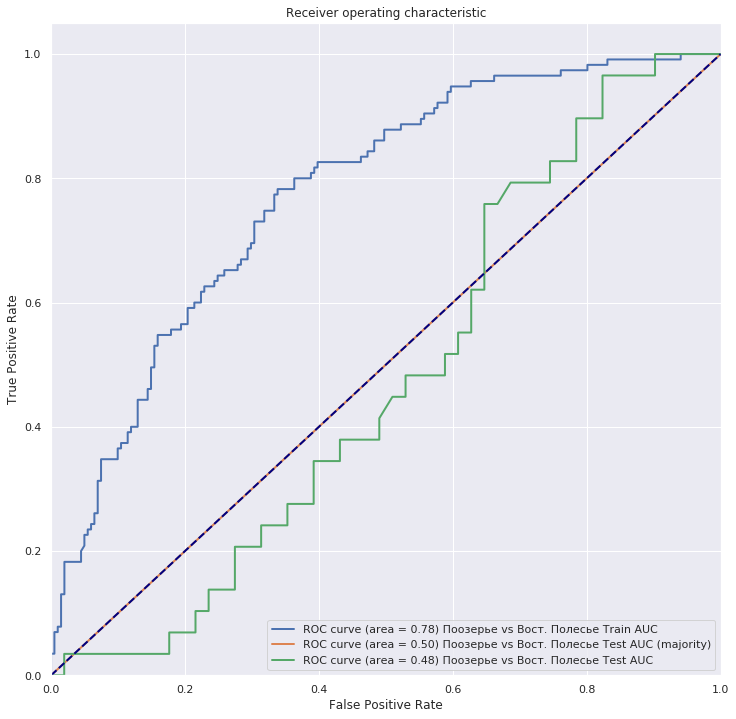

Зап. Полесье vs Центральный


Центральный     394
Зап. Полесье    235
Name: region, dtype: int64

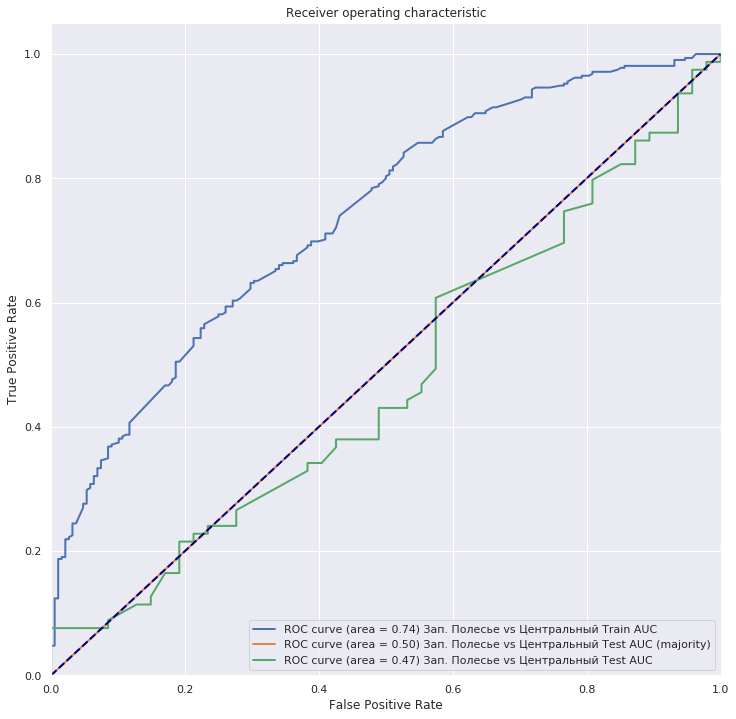

Зап. Полесье vs Понеманье


Зап. Полесье    235
Понеманье       149
Name: region, dtype: int64

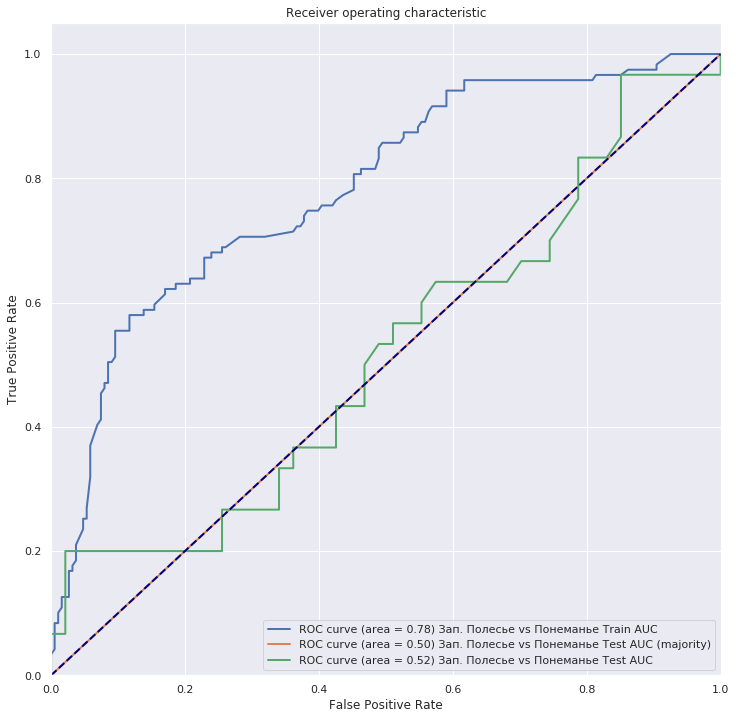

Зап. Полесье vs Поднепровье


Зап. Полесье    235
Поднепровье     187
Name: region, dtype: int64

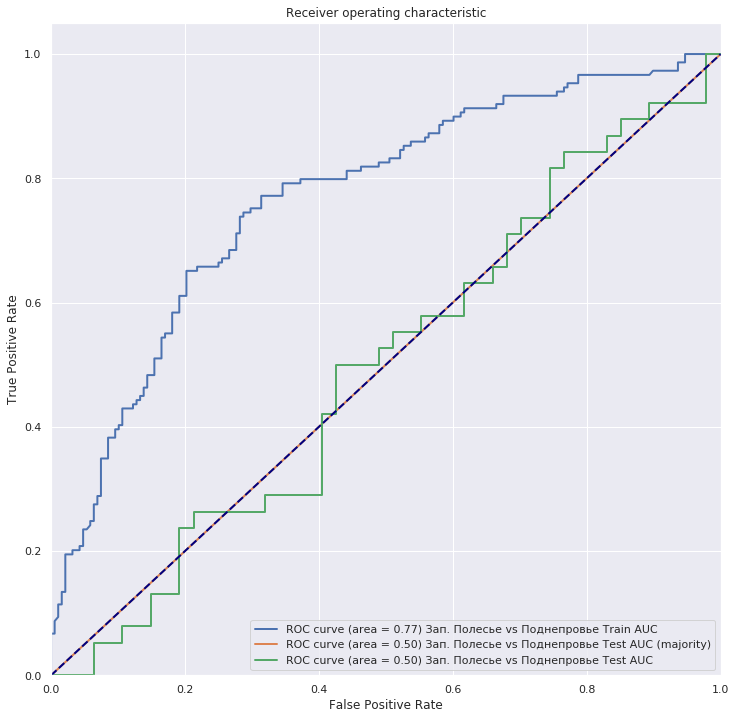

Зап. Полесье vs Вост. Полесье


Зап. Полесье     235
Вост. Полесье    144
Name: region, dtype: int64

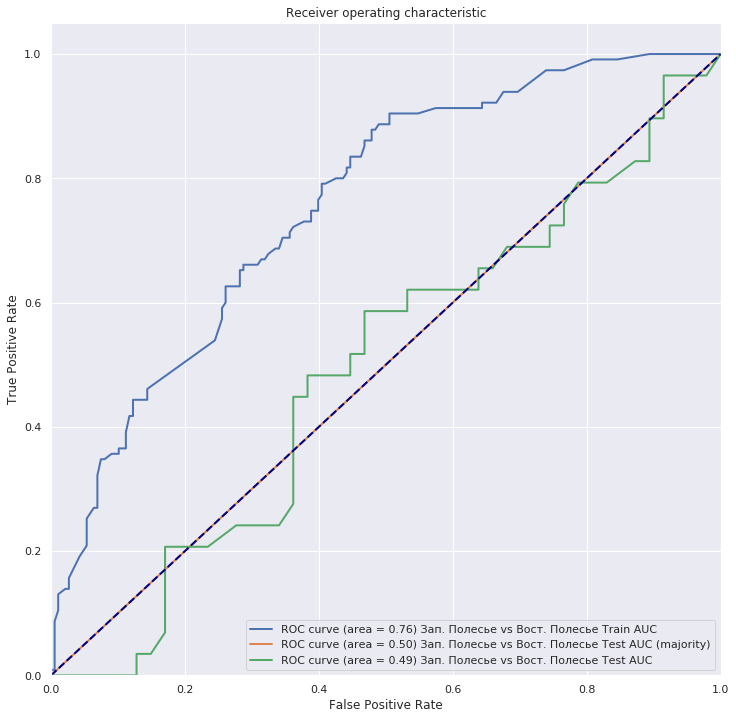

Центральный vs Понеманье


Центральный    394
Понеманье      149
Name: region, dtype: int64

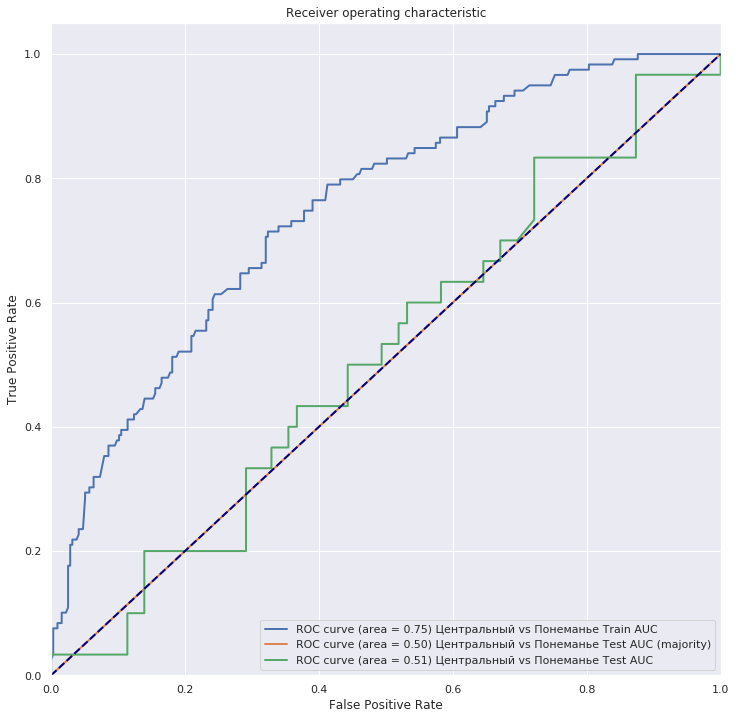

Центральный vs Поднепровье


Центральный    394
Поднепровье    187
Name: region, dtype: int64

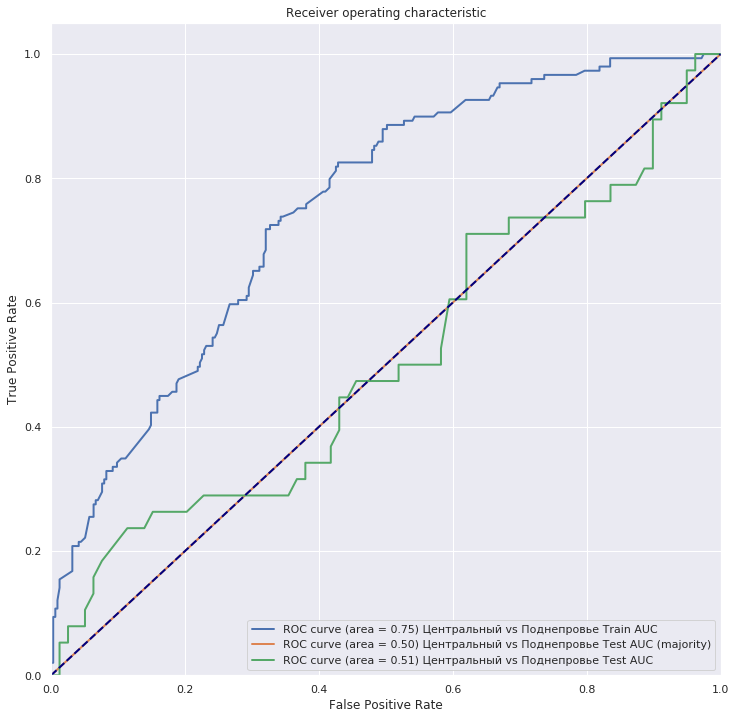

Центральный vs Вост. Полесье


Центральный      394
Вост. Полесье    144
Name: region, dtype: int64

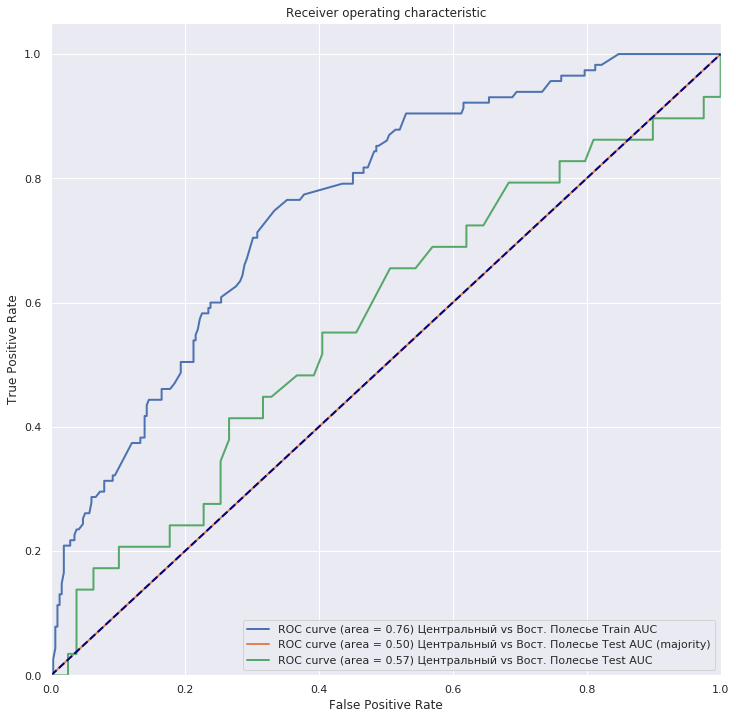

Понеманье vs Поднепровье


Поднепровье    187
Понеманье      149
Name: region, dtype: int64

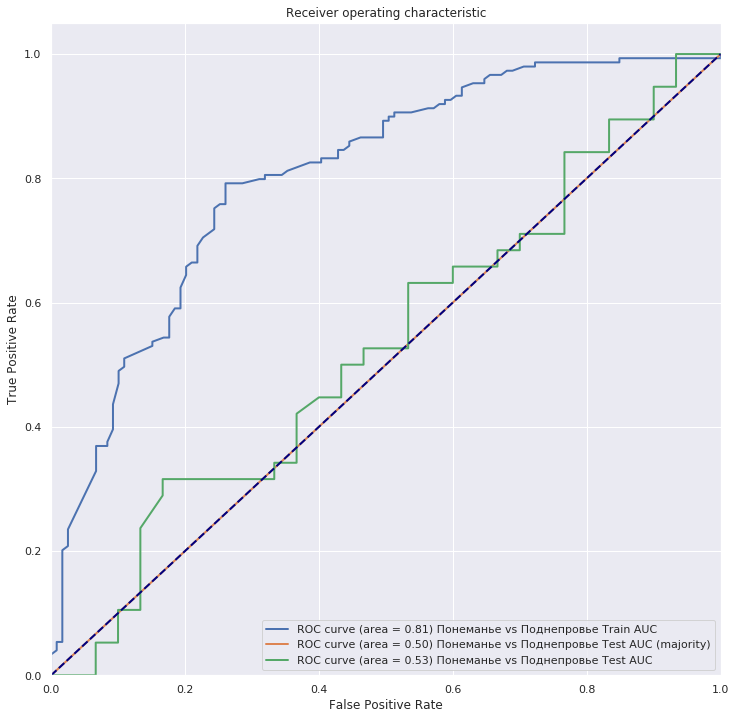

Понеманье vs Вост. Полесье


Понеманье        149
Вост. Полесье    144
Name: region, dtype: int64

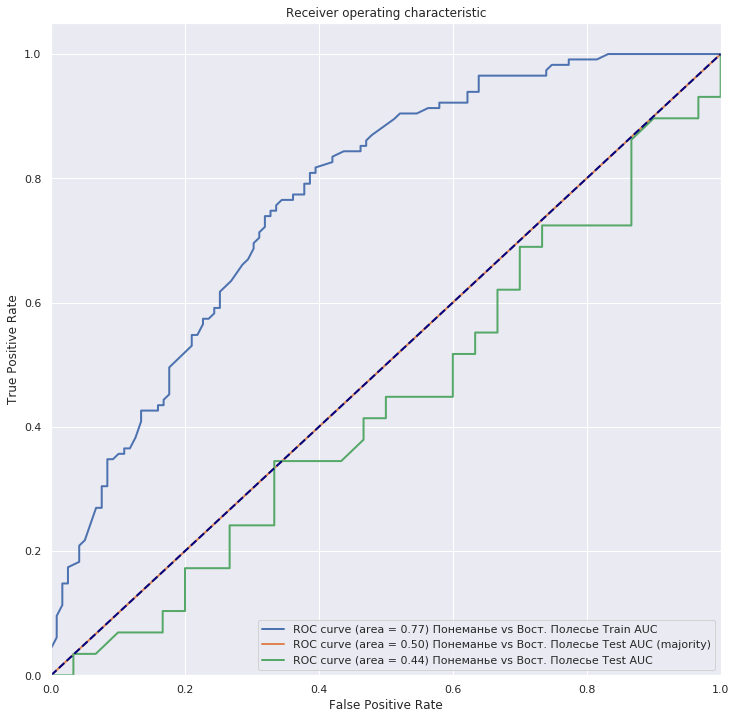

Поднепровье vs Вост. Полесье


Поднепровье      187
Вост. Полесье    144
Name: region, dtype: int64

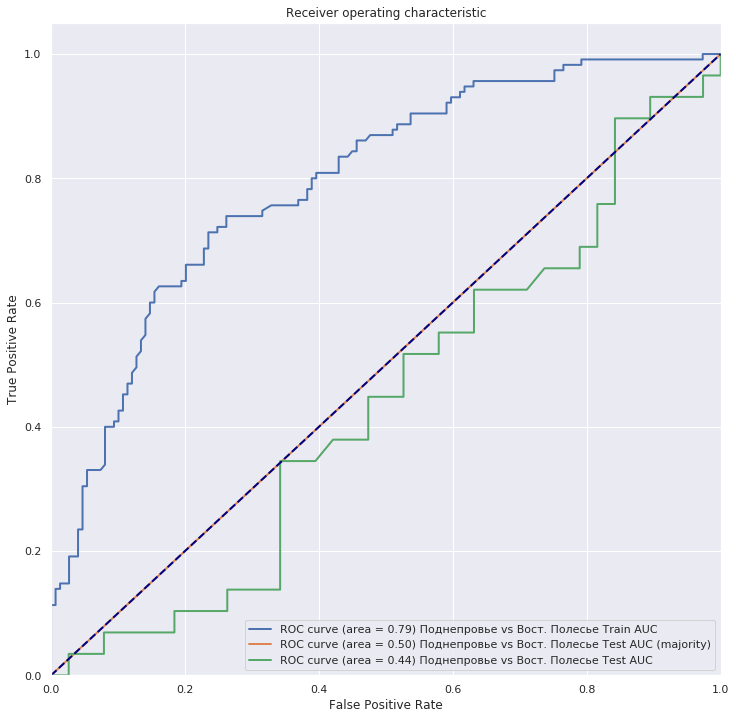

In [55]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

REGIONS = merged_data.region.unique()

for i, region0 in enumerate(REGIONS):
    for j, region1 in enumerate(REGIONS):
        if region0 != region1 and i < j:
            title = f'{region0} vs {region1}'
            print(title)
            regions = [region0, region1]
            data = merged_data.query('region in @regions')
            display(data.region.value_counts())
            
            X_train, X_test, y_train, y_test = train_test_split(
                data[LOCI], data['region'], stratify = data['region'], shuffle=True, test_size=0.2)
            y_train = (y_train == region1).astype('int')
            y_test = (y_test == region1).astype('int')

            lgbm_model = LGBMClassifier(num_leaves=3, n_estimators=20)
            lgbm_model.fit(X_train, y_train)
            
            train_preds = lgbm_model.predict_proba(X_train)[:, 1]
            test_preds = lgbm_model.predict_proba(X_test)[:, 1]
            plot_roc_aucs([
                [y_train, train_preds, f'{title} Train AUC'],
                [y_test, np.ones(y_test.shape[0]) * (np.mean(y_train) < 0.5), f'{title} Test AUC (majority)'],
                [y_test, test_preds, f'{title} Test AUC']
            ])